In [92]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import statsmodels.api as sm
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import pandas as pd
import numpy as np
import scipy
import scipy.stats
from matplotlib import pyplot as plt
from scipy import stats
from scipy.stats import chisquare

## Statistical Summary 

In [2]:
disney = pd.read_csv("disney_movies.csv")
disney.head()

,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross
0,Snow White and the Seven Dwarfs,1937-12-21,Musical,G,184925485,5228953251
1,Pinocchio,1940-02-09,Adventure,G,84300000,2188229052
2,Fantasia,1940-11-13,Musical,G,83320000,2187090808
3,Song of the South,1946-11-12,Adventure,G,65000000,1078510579
4,Cinderella,1950-02-15,Drama,G,85000000,920608730


In [3]:
sortedata = disney.sort_values('inflation_adjusted_gross',ascending=False)
sortedata.head(10)

,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross
0,Snow White and the Seven Dwarfs,1937-12-21,Musical,G,184925485,5228953251
1,Pinocchio,1940-02-09,Adventure,G,84300000,2188229052
2,Fantasia,1940-11-13,Musical,G,83320000,2187090808
8,101 Dalmatians,1961-01-25,Comedy,G,153000000,1362870985
6,Lady and the Tramp,1955-06-22,Drama,G,93600000,1236035515
3,Song of the South,1946-11-12,Adventure,G,65000000,1078510579
564,Star Wars Ep. VII: The Force Awakens,2015-12-18,Adventure,PG-13,936662225,936662225
4,Cinderella,1950-02-15,Drama,G,85000000,920608730
13,The Jungle Book,1967-10-18,Musical,Not Rated,141843000,789612346
179,The Lion King,1994-06-15,Adventure,G,422780140,761640898


In [4]:
disney.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 579 entries, 0 to 578
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   movie_title               579 non-null    object
 1   release_date              579 non-null    object
 2   genre                     562 non-null    object
 3   mpaa_rating               523 non-null    object
 4   total_gross               579 non-null    int64 
 5   inflation_adjusted_gross  579 non-null    int64 
dtypes: int64(2), object(4)
memory usage: 27.3+ KB


In [5]:
# Converting release_date to date type
disney['release_date'] = pd.to_datetime(disney['release_date'])

In [6]:
# create an new column named release_year
disney['release_year'] = pd.DatetimeIndex(disney['release_date']).year

In [7]:
disney.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 579 entries, 0 to 578
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   movie_title               579 non-null    object        
 1   release_date              579 non-null    datetime64[ns]
 2   genre                     562 non-null    object        
 3   mpaa_rating               523 non-null    object        
 4   total_gross               579 non-null    int64         
 5   inflation_adjusted_gross  579 non-null    int64         
 6   release_year              579 non-null    int64         
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 31.8+ KB


In [8]:
disney.columns

Index(['movie_title', 'release_date', 'genre', 'mpaa_rating', 'total_gross',
       'inflation_adjusted_gross', 'release_year'],
      dtype='object')

## 1

In [9]:
table1 = disney.groupby(['genre','release_year','movie_title']).mean()
genre_yearly = table1.reset_index()
genre_yearly.head(10)

,genre,release_year,movie_title,total_gross,inflation_adjusted_gross
0,Action,1981,Condorman,0,0
1,Action,1982,Tron,26918576,77184895
2,Action,1988,Shoot to Kill,29300000,60097074
3,Action,1988,The Rescue,5855392,12009960
4,Action,1990,Dick Tracy,103738726,207231621
5,Action,1990,Fire Birds,14760451,29485923
6,Action,1991,One Good Cop,11276846,22580472
7,Action,1991,The Rocketeer,46573027,93256673
8,Action,1992,3 Ninjas,29028000,58965304
9,Action,1993,Super Mario Bros.,20844907,42445058


## 2

In [10]:
table2=disney.groupby(['genre']).describe()['total_gross']
df2=table2.reset_index()
df2

,genre,count,mean,std,min,25%,50%,75%,max
0,Action,40.0,1.046141e+08,1.400622e+08,0.0,28500644.00,43315244.5,1.056915e+08,623279547.0
1,Adventure,129.0,1.270471e+08,1.421435e+08,2815.0,24103594.00,65000000.0,2.008219e+08,936662225.0
2,Black Comedy,3.0,3.251440e+07,1.803695e+07,17105219.0,22594788.00,28084357.0,4.021900e+07,52353636.0
3,Comedy,182.0,4.461329e+07,4.555087e+07,45779.0,13965615.50,26923500.5,6.248318e+07,244082982.0
4,Concert/Performance,2.0,5.172823e+07,1.916761e+07,38174685.0,44951459.00,51728233.0,5.850501e+07,65281781.0
5,Documentary,16.0,1.129285e+07,1.028833e+07,20521.0,1122075.50,9688331.0,1.726530e+07,32011576.0
6,Drama,114.0,3.602608e+07,3.879405e+07,0.0,7928559.00,19730097.0,5.695889e+07,201151353.0
7,Horror,6.0,1.451148e+07,9.377734e+06,4877567.0,6386971.75,13439137.5,2.188952e+07,26570463.0
8,Musical,16.0,7.233026e+07,6.515831e+07,5632086.0,23016824.25,53041787.5,9.992016e+07,218951625.0
9,Romantic Comedy,23.0,5.009595e+07,4.947553e+07,468240.0,15282912.50,32680633.0,6.428737e+07,178406268.0


## 3

In [11]:
table3=disney.groupby(['genre']).describe()['inflation_adjusted_gross']
dff3=table3.reset_index()
dff3

,genre,count,mean,std,min,25%,50%,75%,max
0,Action,40.0,1.374734e+08,1.453101e+08,0.0,44252996.25,69012064.5,1.889025e+08,6.600812e+08
1,Adventure,129.0,1.903974e+08,2.546016e+08,2984.0,48114115.00,102254492.0,2.562634e+08,2.188229e+09
2,Black Comedy,3.0,5.224349e+07,2.418967e+07,28392518.0,39986141.00,51579764.0,6.416898e+07,7.675819e+07
3,Comedy,182.0,8.466773e+07,1.226476e+08,82277.0,25297336.00,51195217.0,1.094345e+08,1.362871e+09
4,Concert/Performance,2.0,5.741084e+07,2.720403e+07,38174685.0,47792762.00,57410839.0,6.702892e+07,7.664699e+07
5,Documentary,16.0,1.271803e+07,1.133772e+07,23064.0,1279543.50,12344483.5,1.894742e+07,3.598101e+07
6,Drama,114.0,7.189302e+07,1.461092e+08,0.0,13780046.75,39325794.0,8.710685e+07,1.236036e+09
7,Horror,6.0,2.341385e+07,1.393028e+07,9907922.0,15784328.00,18589709.5,2.714772e+07,4.854616e+07
8,Musical,16.0,6.035979e+08,1.346573e+09,11468231.0,77724163.75,103167587.5,2.821255e+08,5.228953e+09
9,Romantic Comedy,23.0,7.777708e+07,7.985530e+07,907414.0,29928224.00,57925202.0,9.867275e+07,3.563898e+08


## 4

In [12]:
disneyx=disney.drop(columns=['release_year','release_date'])
disneyx
table4 = disneyx.groupby('mpaa_rating').sum()
table4

,total_gross,inflation_adjusted_gross
mpaa_rating,,
G,7919792693,25048445571
Not Rated,151387769,899620238
PG,13767914371,18988248082
PG-13,11771207588,14927544680
R,2995266596,5641192166


## 5

In [13]:
avg_rating5 = disneyx.groupby('genre').sum()
avg_rating5

,total_gross,inflation_adjusted_gross
genre,,
Action,4184563282,5498936786
Adventure,16389069453,24561266158
Black Comedy,97543212,156730475
Comedy,8119619678,15409526913
Concert/Performance,103456466,114821678
Documentary,180685619,203488418
Drama,4106972970,8195804484
Horror,87068872,140483092
Musical,1157284155,9657565776


## 6

In [14]:
year_income6 = disney.groupby('release_year').sum()
year_income6

,total_gross,inflation_adjusted_gross
release_year,,
1937,184925485,5228953251
1940,167620000,4375319860
1946,65000000,1078510579
1950,85000000,920608730
1954,28200000,528279994
1955,93600000,1236035515
1959,9464608,21505832
1961,188599723,1797806719
1962,9230769,109581646


## Explanation
The data contain Disney movies with six features: the movie title, release date, genre, MPAA rating, total gross, and inflation-adjusted gross. We start with exporting the data and checking the top Disney movies earned the most at the box office. We sorted the movies by gross value adjusted for inflation to see the film with the highest-grossing income in Disney movies. We find that the movie named  "Snow White and the Seven Dwarfs" with a genre of music got first place. Also, there are some specific movie genres, such as action, that are pretty popular among audiences list. To this end, we group movies by genre and year. We then form a data set using the variable of adjusting for overall gross and inflation-adjusted. Check the annual adjusted total income of each genre. We can see the average value of the total gross and adjusted inflation gross of each movie genre. We found that both adventure and action movies are at the top of the list, combined with the total gross. The standard deviation of the horror film is the smallest in the second icon, indicating that its total gross is the most stable. The smallest documentary standard deviation in the third icon indicates that the inflation-adjusted gross of this type of movie is the most durable. In 1937, based on the inflation rate, the gross profit margin reached 5.2 billion dollars. Still, it was only 2.8 billion dollars in 2016, indicating that people's spending power in a movie theatre in the past was much higher than it is now. However, in MPAA rating, because the audience of R-rated movies is mainly concentrated in adults aged 18 or above, the relative audience population is narrow. Therefore, the total gross and inflation-adjusted gross of these years are very small, and Disney can maintain the current level of investment in R-rated movies and focus more on popular action and adventure movies.

## Sgementation

In [15]:
family = pd.read_csv("family_segments.csv")

In [16]:
family.head()

,hhold_ID,est_net_worth,est_inc,domestic,number_visits,number_children,oldest_child_age,dis_plus_sub,online_merch_avg,est_annual_travel,est_annual_leisure,est_hhold_FICO
0,1,7525,7825,1,0,2,9.0,0,826.0,2309.0,4094.0,701
1,2,639815,449775,1,1,2,11.0,0,1779.0,9060.0,8670.0,764
2,3,288847,204750,1,6,3,13.0,1,2121.0,6436.0,5021.0,720
3,4,191791,136730,1,1,1,8.0,1,1880.0,13107.0,66074.0,783
4,5,96527,72165,0,3,0,NaN,0,775.0,2042.0,2846.0,757


In [17]:
family.tail()

,hhold_ID,est_net_worth,est_inc,domestic,number_visits,number_children,oldest_child_age,dis_plus_sub,online_merch_avg,est_annual_travel,est_annual_leisure,est_hhold_FICO
9245,9246,129634,95375,1,1,2,11.0,0,816.0,487.0,4318.0,767
9246,9247,5039615,3526325,1,8,2,17.0,1,1740.0,23538.0,67016.0,751
9247,9248,259279,184580,1,0,2,9.0,1,1843.0,6320.0,5843.0,749
9248,9249,43471,33375,1,1,2,13.0,0,760.0,1215.0,1189.0,791
9249,9250,184765,134550,1,2,2,12.0,1,1717.0,3445.0,3463.0,733


In [18]:
family_1=family.drop("hhold_ID",axis=1)

In [19]:
family_1.describe()

,est_net_worth,est_inc,domestic,number_visits,number_children,oldest_child_age,dis_plus_sub,online_merch_avg,est_annual_travel,est_annual_leisure,est_hhold_FICO
count,9.250000e+03,9.250000e+03,9250.000000,9250.000000,9250.000000,8724.000000,9250.000000,9250.000000,9250.000000,9250.000000,9250.000000
mean,6.739056e+05,4.758774e+05,0.724216,2.669946,2.224000,11.981774,0.645730,1324.083568,8233.196108,8933.807784,750.275459
std,1.335709e+06,8.764279e+05,0.446933,3.295406,1.124236,2.018205,0.478317,537.160465,10296.726389,13101.418846,25.329610
min,5.100000e+01,3.700000e+02,0.000000,0.000000,0.000000,5.000000,0.000000,669.000000,0.000000,2.000000,655.000000
25%,4.264950e+04,3.327000e+04,0.000000,1.000000,1.000000,11.000000,0.000000,786.000000,1757.000000,1891.000000,733.000000
50%,1.666520e+05,1.224650e+05,1.000000,2.000000,2.000000,12.000000,1.000000,1378.500000,3880.000000,3632.000000,750.000000
75%,6.488230e+05,4.553300e+05,1.000000,3.000000,3.000000,13.000000,1.000000,1804.000000,9948.750000,9203.750000,768.000000
max,9.883250e+06,5.497405e+06,1.000000,47.000000,7.000000,18.000000,1.000000,2759.000000,49885.000000,74805.000000,847.000000


In [20]:
family_1=family_1.replace(np.nan,0)

In [21]:
family_1.head()

,est_net_worth,est_inc,domestic,number_visits,number_children,oldest_child_age,dis_plus_sub,online_merch_avg,est_annual_travel,est_annual_leisure,est_hhold_FICO
0,7525,7825,1,0,2,9.0,0,826.0,2309.0,4094.0,701
1,639815,449775,1,1,2,11.0,0,1779.0,9060.0,8670.0,764
2,288847,204750,1,6,3,13.0,1,2121.0,6436.0,5021.0,720
3,191791,136730,1,1,1,8.0,1,1880.0,13107.0,66074.0,783
4,96527,72165,0,3,0,0.0,0,775.0,2042.0,2846.0,757


In [22]:
scaler = StandardScaler()
scaler.fit(family_1)
data_normalized = scaler.transform(family_1)
data_normalized = pd.DataFrame(data=data_normalized, index=family_1.index, columns=family_1.columns)
print(data_normalized.describe().round(2))

       est_net_worth  est_inc  domestic  number_visits  number_children  \
count        9250.00  9250.00   9250.00        9250.00          9250.00   
mean            0.00    -0.00     -0.00           0.00            -0.00   
std             1.00     1.00      1.00           1.00             1.00   
min            -0.50    -0.54     -1.62          -0.81            -1.98   
25%            -0.47    -0.51     -1.62          -0.51            -1.09   
50%            -0.38    -0.40      0.62          -0.20            -0.20   
75%            -0.02    -0.02      0.62           0.10             0.69   
max             6.90     5.73      0.62          13.45             4.25   

       oldest_child_age  dis_plus_sub  online_merch_avg  est_annual_travel  \
count           9250.00       9250.00           9250.00            9250.00   
mean              -0.00         -0.00             -0.00               0.00   
std                1.00          1.00              1.00               1.00   
min         

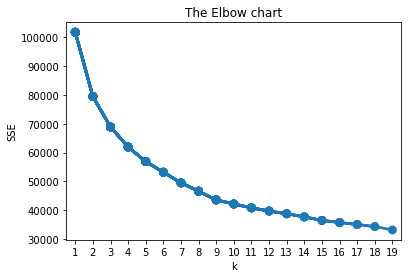

In [23]:
sse ={}
for k in range(1,20):
    kmeans = KMeans(n_clusters=k,random_state=600)
    kmeans.fit(data_normalized)
    sse[k] = kmeans.inertia_
    plt.title('The Elbow chart')
    plt.xlabel('k')
    plt.ylabel('SSE')
    sns.pointplot(x=list(sse.keys()),y=list(sse.values()));

In [24]:
family_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9250 entries, 0 to 9249
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   est_net_worth       9250 non-null   int64  
 1   est_inc             9250 non-null   int64  
 2   domestic            9250 non-null   int64  
 3   number_visits       9250 non-null   int64  
 4   number_children     9250 non-null   int64  
 5   oldest_child_age    9250 non-null   float64
 6   dis_plus_sub        9250 non-null   int64  
 7   online_merch_avg    9250 non-null   float64
 8   est_annual_travel   9250 non-null   float64
 9   est_annual_leisure  9250 non-null   float64
 10  est_hhold_FICO      9250 non-null   int64  
dtypes: float64(4), int64(7)
memory usage: 795.0 KB


In [25]:
family_1['est_net_worth'] = family_1['est_net_worth'].astype(float)
family_1['est_inc'] = family_1['est_inc'].astype(float)
family_1['domestic'] = family_1['domestic'].astype(float)
family_1['number_visits'] = family_1['number_visits'].astype(float)
family_1['number_children'] = family_1['number_children'].astype(float)
family_1['dis_plus_sub'] = family_1['dis_plus_sub'].astype(float)
family_1['est_hhold_FICO'] = family_1['est_hhold_FICO'].astype(float)

In [26]:
family_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9250 entries, 0 to 9249
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   est_net_worth       9250 non-null   float64
 1   est_inc             9250 non-null   float64
 2   domestic            9250 non-null   float64
 3   number_visits       9250 non-null   float64
 4   number_children     9250 non-null   float64
 5   oldest_child_age    9250 non-null   float64
 6   dis_plus_sub        9250 non-null   float64
 7   online_merch_avg    9250 non-null   float64
 8   est_annual_travel   9250 non-null   float64
 9   est_annual_leisure  9250 non-null   float64
 10  est_hhold_FICO      9250 non-null   float64
dtypes: float64(11)
memory usage: 795.0 KB


In [27]:
kmodel_1=KMeans(n_clusters=7, random_state=654)
kmodel_1.fit(data_normalized)
labels = kmodel_1.predict(data_normalized)

In [28]:
kmodel_2 = family_1.assign(Cluster1 = labels)
kmodel_2.groupby(['Cluster1']).agg({
    'est_net_worth':'mean',
    'est_inc':'mean',
    'domestic':'mean',
    'number_visits':'mean',
    'number_children':'mean',
    'oldest_child_age':'mean',
    'dis_plus_sub':'mean',
    'online_merch_avg':'mean',
    'est_annual_travel':'mean',
    'est_hhold_FICO':'mean',
 }).round(2)

,est_net_worth,est_inc,domestic,number_visits,number_children,oldest_child_age,dis_plus_sub,online_merch_avg,est_annual_travel,est_hhold_FICO
Cluster1,,,,,,,,,,
0,112829.34,77730.33,1.00,2.24,2.24,11.94,0.00,933.47,3112.81,748.82
1,265633.48,206341.15,0.00,2.42,2.29,12.02,0.60,1195.35,4629.37,750.59
2,6040526.57,3568657.31,0.73,2.81,2.16,11.32,0.81,1844.29,19948.39,747.18
3,377681.40,282996.54,0.72,2.96,0.00,0.02,0.57,1226.65,6117.78,753.13
4,617549.57,538058.48,0.99,2.93,2.44,12.00,0.93,1871.85,8355.88,750.70
5,1839219.15,1301610.15,0.68,2.50,2.34,11.65,0.82,1840.64,30837.73,750.15
6,54701.27,41399.66,1.00,3.16,2.48,11.98,1.00,827.20,3061.54,751.02


In [29]:
kmodel_2.head()

,est_net_worth,est_inc,domestic,number_visits,number_children,oldest_child_age,dis_plus_sub,online_merch_avg,est_annual_travel,est_annual_leisure,est_hhold_FICO,Cluster1
0,7525.0,7825.0,1.0,0.0,2.0,9.0,0.0,826.0,2309.0,4094.0,701.0,0
1,639815.0,449775.0,1.0,1.0,2.0,11.0,0.0,1779.0,9060.0,8670.0,764.0,0
2,288847.0,204750.0,1.0,6.0,3.0,13.0,1.0,2121.0,6436.0,5021.0,720.0,4
3,191791.0,136730.0,1.0,1.0,1.0,8.0,1.0,1880.0,13107.0,66074.0,783.0,5
4,96527.0,72165.0,0.0,3.0,0.0,0.0,0.0,775.0,2042.0,2846.0,757.0,3


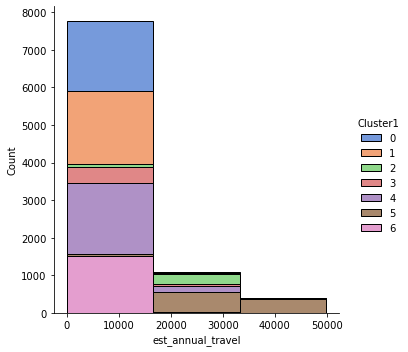

In [30]:
sns.displot(x='est_annual_travel', hue='Cluster1', bins=3
        
            , palette='muted', multiple='stack', data=kmodel_2)

The histogram shows how much money that household spend on their traveling by clusters, it seems that cluster 5 spend the most,  household that in cluster 0, cluster 1,cluster 4 and cluster 6 spend on traveling around 10000 doller.And among the customers who visited Lobster Land the least number of times, Cluster 0 accounts for a large percentage compared to cluster 1,4 and 6.

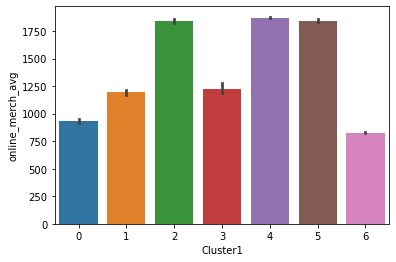

In [31]:
kmodel_2['Cluster1'] = kmodel_2['Cluster1'].astype('category')
sns.barplot(x='Cluster1', y='online_merch_avg', data=kmodel_2);

In this barplot, it shows cluster0 and 6 have low online 
merchandise power which Compared with other 5 clusters.
However, Cluster 2, 4 and 5 have the highest purchasing power.

<AxesSubplot:xlabel='Cluster1', ylabel='est_inc'>

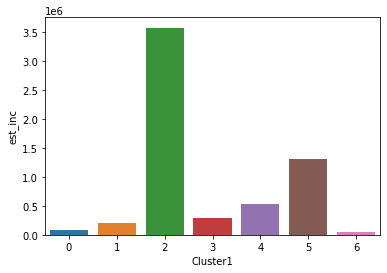

In [32]:
sns.barplot(x='Cluster1',y='est_inc',ci=None,data=kmodel_2)

In this barplot, it show cluster2 has highest income, and cluster6 has the lowest.

<AxesSubplot:xlabel='Cluster1', ylabel='number_visits'>

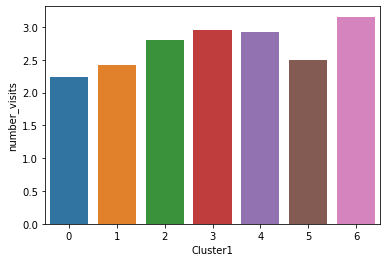

In [33]:
sns.barplot(x='Cluster1',y='number_visits',ci=None,data=kmodel_2)

In this barplot, cluster6 has the highest numbers of visiting disneyland, cluster0 has the lowest. There are no big difference among all the clusters.

<AxesSubplot:xlabel='Cluster1', ylabel='dis_plus_sub'>

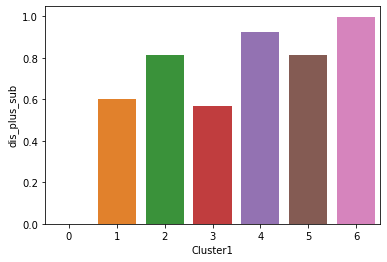

In [34]:
sns.barplot(x='Cluster1',y='dis_plus_sub',ci=None,data=kmodel_2)

According to the above figure, we can intuitively see that the richest majority comprises cluster 2 and 5. Among these clusters, cluster 2 and 5 has the most wealth household. Disney can focus more on promotion in this cluster. The cluster 0 has least number of high-salary household.

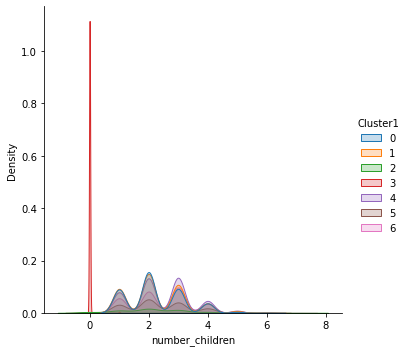

In [35]:
sns.displot(x='number_children', hue='Cluster1', kind='kde', data=kmodel_2, fill=True)

It shows all of the cluster have a good-stand credit score, and cluster4 has the highest density but cluster2 have the lowest.

    cluster0 and 1(household not interested in disney):This cluster has no outstanding feature, they didn't spend too much money on disney's product, even not watch disney movie . For this group household, 
    we have to promote the most basic disney staff to them such as classic movie, products. We can offer some free product to them in limited time,For example, we can offer them free disney plus for 3 months.
    cluster2(high-income household):This cluster is the highest income group, for this group, we do not need too much promotion for them,the thing we can to is to keep increase our high quality product and service to them which can help us to keep and increase their loyalty.
    cluster3(world of two household):This cluster is a group of household that have no child,but amount of they visit disney is the second highest, I think those group people should be the couples and lovers who enjoy world of two.
    cluster4(disney fans family): This cluster spend a lot on disney plus and online merchandise products, and another charateristic in the family that they have largest numbers of children. For this group of people, we can reach out to the household by improving family happy experience in when they visit disneyland.
    cluster5(traveling lover family):This cluster spend lots of money on travling, and they also spend a lot on disney's products. In order to reach out those people, the best way is that park increase their experience if they take a tour in Disneyland.
    cluster6(Disney superfans family): The data in this Cluster is extreme, it has the lowest annaul income, highest value in subscribes to Disney+ streaming and numbers of visit. we can reach out this group by offer some discount on disney products.

## Conjoin

In [36]:
Hotel = pd.read_csv("hotel_amenities.csv")

In [37]:
Hotel.head()

,WiFi_Network,breakfast,parking,gym,flex_check,shuttle_bus,air_pure,jacuzzi,VIP_shop,pool_temp,avg_rating
0,Basic,None,Valet,None,No,No,No,No,No,76,4.57
1,Basic,None,Valet,None,No,No,No,No,No,80,7.60
2,Basic,None,Valet,None,No,No,No,No,No,84,5.66
3,Basic,None,Valet,None,No,No,No,No,Yes,76,2.80
4,Basic,None,Valet,None,No,No,No,No,Yes,80,4.56


In [38]:
print(Hotel.dtypes)

WiFi_Network     object
breakfast        object
parking          object
gym              object
flex_check       object
shuttle_bus      object
air_pure         object
jacuzzi          object
VIP_shop         object
pool_temp         int64
avg_rating      float64
dtype: object


In [39]:
print(Hotel.columns)

Index(['WiFi_Network', 'breakfast', 'parking', 'gym', 'flex_check',
       'shuttle_bus', 'air_pure', 'jacuzzi', 'VIP_shop', 'pool_temp',
       'avg_rating'],
      dtype='object')


In [40]:
dummy_Hotel=pd.get_dummies(Hotel, drop_first=True,columns=['WiFi_Network', 'breakfast', 'parking', 'gym', 'flex_check',
       'shuttle_bus', 'air_pure', 'jacuzzi', 'VIP_shop', 'pool_temp'])

In [41]:
print(dummy_Hotel.dtypes)

avg_rating                    float64
WiFi_Network_Best in Class      uint8
WiFi_Network_Strong             uint8
breakfast_Full Buffet           uint8
breakfast_None                  uint8
parking_Valet                   uint8
gym_Basic                       uint8
gym_None                        uint8
gym_Super                       uint8
flex_check_Yes                  uint8
shuttle_bus_Yes                 uint8
air_pure_Yes                    uint8
jacuzzi_Yes                     uint8
VIP_shop_Yes                    uint8
pool_temp_80                    uint8
pool_temp_84                    uint8
dtype: object


In [42]:
dummy_Hotel.columns

Index(['avg_rating', 'WiFi_Network_Best in Class', 'WiFi_Network_Strong',
       'breakfast_Full Buffet', 'breakfast_None', 'parking_Valet', 'gym_Basic',
       'gym_None', 'gym_Super', 'flex_check_Yes', 'shuttle_bus_Yes',
       'air_pure_Yes', 'jacuzzi_Yes', 'VIP_shop_Yes', 'pool_temp_80',
       'pool_temp_84'],
      dtype='object')

In [43]:
X= dummy_Hotel[[ 'WiFi_Network_Best in Class', 'WiFi_Network_Strong',
       'breakfast_Full Buffet', 'breakfast_None', 'parking_Valet', 'gym_Basic',
       'gym_None', 'gym_Super', 'flex_check_Yes', 'shuttle_bus_Yes',
       'air_pure_Yes', 'jacuzzi_Yes', 'VIP_shop_Yes', 'pool_temp_80',
       'pool_temp_84']]
y= dummy_Hotel["avg_rating"]
regressor = LinearRegression()
regressor.fit(X,y)

LinearRegression()

In [44]:
coef_df=pd.DataFrame(regressor.coef_,X.columns,columns=["Coefficient"])

In [45]:
df = pd.DataFrame(data=coef_df)
df=df.rename_axis('Amenity_Level').reset_index()
df

,Amenity_Level,Coefficient
0,WiFi_Network_Best in Class,1.726814
1,WiFi_Network_Strong,1.187700
2,breakfast_Full Buffet,0.500998
3,breakfast_None,-0.225924
4,parking_Valet,0.093678
5,gym_Basic,-0.146314
6,gym_None,-0.168484
7,gym_Super,0.044363
8,flex_check_Yes,0.478220
9,shuttle_bus_Yes,0.419939


In [46]:
Hotel_cost = pd.read_csv("amenity_costs.csv")

In [47]:
Hotel_cost["_"]="_"
Hotel_cost["Amenity_Level"]=Hotel_cost["Amenity"]+Hotel_cost["_"]+Hotel_cost["Level"]
df2=Hotel_cost
df2

,Amenity,Level,"Estimated Incremental Cost,\nPer Visitor/Per Night",_,Amenity_Level
0,WiFi_Network,Basic,11.75,_,WiFi_Network_Basic
1,WiFi_Network,Strong,16.25,_,WiFi_Network_Strong
2,WiFi_Network,Best in Class,19.15,_,WiFi_Network_Best in Class
3,breakfast,None,0.00,_,breakfast_None
4,breakfast,Continental,13.25,_,breakfast_Continental
5,breakfast,Full Buffet,22.45,_,breakfast_Full Buffet
6,parking,Valet,60.00,_,parking_Valet
7,parking,Open Lot,15.00,_,parking_Open Lot
8,gym,None,0.00,_,gym_None
9,gym,Basic,10.00,_,gym_Basic


In [48]:
df3=df2.merge(df, on= "Amenity_Level")
df3.sort_values("Coefficient",ascending=False)
df3

,Amenity,Level,"Estimated Incremental Cost,\nPer Visitor/Per Night",_,Amenity_Level,Coefficient
0,WiFi_Network,Strong,16.25,_,WiFi_Network_Strong,1.187700
1,WiFi_Network,Best in Class,19.15,_,WiFi_Network_Best in Class,1.726814
2,breakfast,None,0.00,_,breakfast_None,-0.225924
3,breakfast,Full Buffet,22.45,_,breakfast_Full Buffet,0.500998
4,parking,Valet,60.00,_,parking_Valet,0.093678
5,gym,None,0.00,_,gym_None,-0.168484
6,gym,Basic,10.00,_,gym_Basic,-0.146314
7,gym,Super,65.00,_,gym_Super,0.044363
8,flex_check,Yes,12.00,_,flex_check_Yes,0.478220
9,shuttle_bus,Yes,75.00,_,shuttle_bus_Yes,0.419939


In [49]:
merged_left = pd.merge(left=df2, right=df3, how='left', left_on=("Estimated Incremental Cost,\nPer Visitor/Per Night",'Amenity_Level',"Amenity","Level","_"), right_on=("Estimated Incremental Cost,\nPer Visitor/Per Night",'Amenity_Level',"Amenity","Level","_"))
merged_left["Coefficient"]=merged_left["Coefficient"].replace(np.nan,0)
merged_left

,Amenity,Level,"Estimated Incremental Cost,\nPer Visitor/Per Night",_,Amenity_Level,Coefficient
0,WiFi_Network,Basic,11.75,_,WiFi_Network_Basic,0.000000
1,WiFi_Network,Strong,16.25,_,WiFi_Network_Strong,1.187700
2,WiFi_Network,Best in Class,19.15,_,WiFi_Network_Best in Class,1.726814
3,breakfast,None,0.00,_,breakfast_None,-0.225924
4,breakfast,Continental,13.25,_,breakfast_Continental,0.000000
5,breakfast,Full Buffet,22.45,_,breakfast_Full Buffet,0.500998
6,parking,Valet,60.00,_,parking_Valet,0.093678
7,parking,Open Lot,15.00,_,parking_Open Lot,0.000000
8,gym,None,0.00,_,gym_None,-0.168484
9,gym,Basic,10.00,_,gym_Basic,-0.146314


In [50]:
list_Coefficient=merged_left.drop(columns=['Amenity', 'Level'])
list_Coefficient

,"Estimated Incremental Cost,\nPer Visitor/Per Night",_,Amenity_Level,Coefficient
0,11.75,_,WiFi_Network_Basic,0.000000
1,16.25,_,WiFi_Network_Strong,1.187700
2,19.15,_,WiFi_Network_Best in Class,1.726814
3,0.00,_,breakfast_None,-0.225924
4,13.25,_,breakfast_Continental,0.000000
5,22.45,_,breakfast_Full Buffet,0.500998
6,60.00,_,parking_Valet,0.093678
7,15.00,_,parking_Open Lot,0.000000
8,0.00,_,gym_None,-0.168484
9,10.00,_,gym_Basic,-0.146314


In [51]:
ranking_rate_costs=list_Coefficient.sort_values("Coefficient",ascending=False)
ranking_rate_costs.reset_index(drop=True)

,"Estimated Incremental Cost,\nPer Visitor/Per Night",_,Amenity_Level,Coefficient
0,19.15,_,WiFi_Network_Best in Class,1.726814
1,16.25,_,WiFi_Network_Strong,1.187700
2,22.45,_,breakfast_Full Buffet,0.500998
3,12.00,_,flex_check_Yes,0.478220
4,75.00,_,shuttle_bus_Yes,0.419939
5,12.00,_,VIP_shop_Yes,0.217925
6,40.00,_,jacuzzi_Yes,0.183909
7,60.00,_,parking_Valet,0.093678
8,12.85,_,air_pure_Yes,0.075258
9,65.00,_,gym_Super,0.044363


In [118]:
total = ranking_rate_costs.iloc[[0,2,3,4,5,6,15,9,19,18]].sum()
print(total)

Estimated Incremental Cost,\nPer Visitor/Per Night                                                295.6
_                                                                                            __________
Amenity_Level                                         WiFi_Network_Best in Classbreakfast_Full Buffe...
Coefficient                                                                                     3.57217
dtype: object


In [119]:
Plan_1 = ranking_rate_costs.iloc[[0,2,3,4,5,6,15,9,19,18]]
Plan_1.reset_index(drop=True)

,"Estimated Incremental Cost,\nPer Visitor/Per Night",_,Amenity_Level,Coefficient
0,19.15,_,WiFi_Network_Best in Class,1.726814
1,22.45,_,breakfast_Full Buffet,0.500998
2,12.00,_,flex_check_Yes,0.478220
3,75.00,_,shuttle_bus_Yes,0.419939
4,12.00,_,VIP_shop_Yes,0.217925
5,40.00,_,jacuzzi_Yes,0.183909
6,0.00,_,jacuzzi_No,0.000000
7,65.00,_,gym_Super,0.044363
8,15.00,_,parking_Open Lot,0.000000
9,35.00,_,gym_Advanced,0.000000


## Explanation
The total cost can not higher than $250 and we want the coefficient as high as possible in order to build the hotel with highest satisfaction rate for customers. 

As we can see from the table above, we total have 10 amenity need to determine. the 0-7 have the coefficient higher than 0.1, and only WiFI showing twice in 0-7, we add all 0-7 together and filling what lift amenity based on the cost limitation, however, we found that the None_gym have the high negetive coefficient, we need to justfy the amenity catogories again try to avoid the high negetivity of none gym. 

We only have $ 250 costs, and we may not affordable the super gym since the coefficient of super gym is not high enough to make our change on other amenities, so we drop the 7, Jacuzzi_yes in order to choose the advanced gym since the none gym hurt our coefficient -0.168 almost the same as Jacuzzi_y 0.183

We generate one plan about the Hotle amenity show below, the first plan spend the cost 248.45 with 3.6829 coefficient, and the amenity show form the above. This would be the best choice for this hotle. 
 
So we recommond the park for the amenities from our plan, we choose the amenity with WIFI network best in class, the breakfast with full buffet, the having the flex check, having the shuttle bus, pool temperature with 84F, having VIP shop, not having jacuzzi, having the air pure, open parking lot, and advanced gym.

## Forecast Net Income

In [53]:
Net_Income=pd.read_csv('Disney Net income.csv')

In [54]:
Net_Income.head()

,Date,Net Income (Millions of US $)
0,9/30/20,-710
1,6/30/20,-4721
2,3/31/20,460
3,12/31/19,2107
4,9/30/19,1054


In [56]:
# create an new column named release_year
Net_Income['Date'] = pd.DatetimeIndex(Net_Income['Date']).year

In [57]:
a=Net_Income[['Date']]
b=Net_Income['Net Income (Millions of US $)']

In [60]:
model=sm.OLS(b, a).fit()
model_prediction=model.predict(a)

In [61]:
model_details=model.summary()
print(model_details)

                                      OLS Regression Results                                      
Dep. Variable:     Net Income (Millions of US $)   R-squared (uncentered):                   0.594
Model:                                       OLS   Adj. R-squared (uncentered):              0.587
Method:                            Least Squares   F-statistic:                              90.71
Date:                           Wed, 28 Apr 2021   Prob (F-statistic):                    9.48e-14
Time:                                   23:38:11   Log-Likelihood:                         -537.35
No. Observations:                             63   AIC:                                      1077.
Df Residuals:                                 62   BIC:                                      1079.
Df Model:                                      1                                                  
Covariance Type:                       nonrobust                                                  
          

Text(0.5, 1.0, 'The net income of each year')

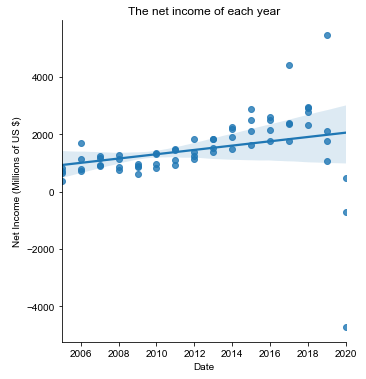

In [63]:
%matplotlib inline
import seaborn as sns
sns.lmplot(x='Date',y='Net Income (Millions of US $)',data=Net_Income)
sns.set(rc={'figure.figsize':(50,50)})
plt.title("The net income of each year")

We did some research on Disney's data of net income in 2019 and 2020, and we collected the in a CSV document. From the OLS Regression Results, we know the F-statistic is  329.2, and the prob (F-statistic) is  8.19e-26. The prob (F-statistic) by random change has a small value and almost close to 0. So, the model overall is significant, and the model has some meaning.

A predictor with a low p-value is likely to be a meaningful addition to our model because changes in the predictor's value are related to changes in the response variable. Conversely, a larger (insignificant) p-value suggests that changes in the predictor are not associated with changes in the response.

## Classification

In [64]:
cruise=pd.read_csv("cruise_returners.csv")

In [65]:
cruise.head()

,hhold_ID,discount_original,coupon_received,cabin_type,est_inc,season_of_year,ticket_spend,cruise_theme,incidental_spending,park_package,embark_port,res_to_port,number_children,oldest_child_age,dis_plus_sub,return_1065
0,3598,1,1,Verandah,19280.985,Winter,2649,prin_fro,2898.754343,1,Vancouver,558,3,6.0,1,0
1,155,1,0,Concierge,825719.960,Spring,2941,Star Wars,2898.754343,1,Port Canaveral,280,3,8.0,1,0
2,353,1,0,Oceanview,3755246.459,Fall,2609,Marvel,11750.829364,1,Port Canaveral,351,3,3.0,1,0
3,1474,1,1,Oceanview,96831.550,Winter,2367,Marvel,13945.343512,1,Copenhagen,314,3,7.0,0,0
4,3272,1,0,Verandah,11027.249,Spring,3021,Marvel,2898.754343,1,Copenhagen,342,4,10.0,1,0


In [66]:
cruise.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   hhold_ID             7500 non-null   int64  
 1   discount_original    7500 non-null   int64  
 2   coupon_received      7500 non-null   int64  
 3   cabin_type           7500 non-null   object 
 4   est_inc              7500 non-null   float64
 5   season_of_year       7500 non-null   object 
 6   ticket_spend         7500 non-null   int64  
 7   cruise_theme         6250 non-null   object 
 8   incidental_spending  7500 non-null   float64
 9   park_package         7500 non-null   int64  
 10  embark_port          7500 non-null   object 
 11  res_to_port          7500 non-null   int64  
 12  number_children      7500 non-null   int64  
 13  oldest_child_age     7130 non-null   float64
 14  dis_plus_sub         7500 non-null   int64  
 15  return_1065          7500 non-null   i

In [67]:
cruise = cruise.astype({'est_inc': 'int', 'incidental_spending': 'int'})

In [68]:
cruise.head()

,hhold_ID,discount_original,coupon_received,cabin_type,est_inc,season_of_year,ticket_spend,cruise_theme,incidental_spending,park_package,embark_port,res_to_port,number_children,oldest_child_age,dis_plus_sub,return_1065
0,3598,1,1,Verandah,19280,Winter,2649,prin_fro,2898,1,Vancouver,558,3,6.0,1,0
1,155,1,0,Concierge,825719,Spring,2941,Star Wars,2898,1,Port Canaveral,280,3,8.0,1,0
2,353,1,0,Oceanview,3755246,Fall,2609,Marvel,11750,1,Port Canaveral,351,3,3.0,1,0
3,1474,1,1,Oceanview,96831,Winter,2367,Marvel,13945,1,Copenhagen,314,3,7.0,0,0
4,3272,1,0,Verandah,11027,Spring,3021,Marvel,2898,1,Copenhagen,342,4,10.0,1,0


In [69]:
cruise.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   hhold_ID             7500 non-null   int64  
 1   discount_original    7500 non-null   int64  
 2   coupon_received      7500 non-null   int64  
 3   cabin_type           7500 non-null   object 
 4   est_inc              7500 non-null   int64  
 5   season_of_year       7500 non-null   object 
 6   ticket_spend         7500 non-null   int64  
 7   cruise_theme         6250 non-null   object 
 8   incidental_spending  7500 non-null   int64  
 9   park_package         7500 non-null   int64  
 10  embark_port          7500 non-null   object 
 11  res_to_port          7500 non-null   int64  
 12  number_children      7500 non-null   int64  
 13  oldest_child_age     7130 non-null   float64
 14  dis_plus_sub         7500 non-null   int64  
 15  return_1065          7500 non-null   i

In [70]:
cruise2=cruise.dropna(axis=0,subset = ["oldest_child_age"])

In [71]:
print(cruise2.isnull().any())

hhold_ID               False
discount_original      False
coupon_received        False
cabin_type             False
est_inc                False
season_of_year         False
ticket_spend           False
cruise_theme            True
incidental_spending    False
park_package           False
embark_port            False
res_to_port            False
number_children        False
oldest_child_age       False
dis_plus_sub           False
return_1065            False
dtype: bool


In [72]:
cruise2 = pd.get_dummies(cruise,drop_first=True,columns=['cabin_type','season_of_year',
                                                                'cruise_theme','embark_port'])
cruise2

,hhold_ID,discount_original,coupon_received,est_inc,ticket_spend,incidental_spending,park_package,res_to_port,number_children,oldest_child_age,...,season_of_year_Winter,cruise_theme_Princess/Frozen,cruise_theme_Star Wars,cruise_theme_prin_fro,cruise_theme_starwars,embark_port_Copenhagen,embark_port_New York,embark_port_Port Canaveral,embark_port_San Diego,embark_port_Vancouver
0,3598,1,1,19280,2649,2898,1,558,3,6.0,...,1,0,0,1,0,0,0,0,0,1
1,155,1,0,825719,2941,2898,1,280,3,8.0,...,0,0,1,0,0,0,0,1,0,0
2,353,1,0,3755246,2609,11750,1,351,3,3.0,...,0,0,0,0,0,0,0,1,0,0
3,1474,1,1,96831,2367,13945,1,314,3,7.0,...,1,0,0,0,0,1,0,0,0,0
4,3272,1,0,11027,3021,2898,1,342,4,10.0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,7464,0,0,169648,2070,2246,1,212,4,13.0,...,1,0,0,0,0,0,0,0,1,0
7496,7469,0,1,4089,2347,7041,0,121,2,13.0,...,1,1,0,0,0,0,0,0,0,0
7497,7482,1,0,21580,3211,12049,0,40,3,18.0,...,0,0,0,1,0,0,1,0,0,0
7498,7490,0,0,1383,1691,9718,0,92,2,5.0,...,0,0,0,0,1,1,0,0,0,0


In [73]:
cruise2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 27 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   hhold_ID                      7500 non-null   int64  
 1   discount_original             7500 non-null   int64  
 2   coupon_received               7500 non-null   int64  
 3   est_inc                       7500 non-null   int64  
 4   ticket_spend                  7500 non-null   int64  
 5   incidental_spending           7500 non-null   int64  
 6   park_package                  7500 non-null   int64  
 7   res_to_port                   7500 non-null   int64  
 8   number_children               7500 non-null   int64  
 9   oldest_child_age              7130 non-null   float64
 10  dis_plus_sub                  7500 non-null   int64  
 11  return_1065                   7500 non-null   int64  
 12  cabin_type_Inside             7500 non-null   uint8  
 13  cab

In [74]:
X = cruise2[['discount_original','coupon_received','est_inc','ticket_spend',
                 'incidental_spending','park_package','res_to_port','number_children',
                'dis_plus_sub'
                ]]
y = cruise2['return_1065']

from sklearn.model_selection import train_test_split

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=480)
X_train

,discount_original,coupon_received,est_inc,ticket_spend,incidental_spending,park_package,res_to_port,number_children,dis_plus_sub
446,1,0,3533,3385,2185,1,15,3,0
1832,0,0,296682,2271,16954,0,73,3,0
4811,0,0,1189081,2272,18184,0,64,4,0
3345,0,1,36297,1981,4669,0,44,3,0
6336,1,1,1122,2335,2898,0,26,2,0
...,...,...,...,...,...,...,...,...,...
6364,0,1,98,3010,2898,1,67,2,1
6025,0,0,54593,2883,10947,1,27,1,0
896,1,0,1343,2414,1916,1,64,3,0
1218,1,0,51716,1740,1863,0,47,3,0


In [76]:
cruise2=cruise.dropna(axis=0,subset = ["est_inc", "incidental_spending","oldest_child_age"])

In [77]:
cruise2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7130 entries, 0 to 7499
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   hhold_ID             7130 non-null   int64  
 1   discount_original    7130 non-null   int64  
 2   coupon_received      7130 non-null   int64  
 3   cabin_type           7130 non-null   object 
 4   est_inc              7130 non-null   int64  
 5   season_of_year       7130 non-null   object 
 6   ticket_spend         7130 non-null   int64  
 7   cruise_theme         5941 non-null   object 
 8   incidental_spending  7130 non-null   int64  
 9   park_package         7130 non-null   int64  
 10  embark_port          7130 non-null   object 
 11  res_to_port          7130 non-null   int64  
 12  number_children      7130 non-null   int64  
 13  oldest_child_age     7130 non-null   float64
 14  dis_plus_sub         7130 non-null   int64  
 15  return_1065          7130 non-null   i

In [78]:
print(cruise2.isnull().any())

hhold_ID               False
discount_original      False
coupon_received        False
cabin_type             False
est_inc                False
season_of_year         False
ticket_spend           False
cruise_theme            True
incidental_spending    False
park_package           False
embark_port            False
res_to_port            False
number_children        False
oldest_child_age       False
dis_plus_sub           False
return_1065            False
dtype: bool


In [108]:
from sklearn.linear_model import LogisticRegression
logistic_regression= LogisticRegression(max_iter=1000)
logistic_regression.fit(X_train,y_train)
y_pred=logistic_regression.predict(X_test)

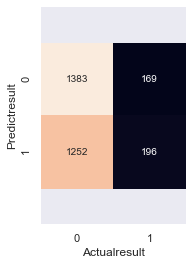

In [109]:
predictions=logistic_regression.predict(X_test)
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test,predictions)
sns.heatmap(mat,square=True,annot=True,cbar=False,fmt='g')
plt.xlabel("Actualresult")
plt.ylabel("Predictresult")
a,b = plt.ylim()
a += 0.5
b -=0.5
plt.ylim(a,b)
plt.show()

In [110]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.5263333333333333

In [111]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.5263333333333333

In [112]:
TP = mat[1][1]
TN = mat[0][0]
FP = mat[0][1]
FN = mat[1][0]
print('True Positives:', TP)
print('True Negatives:', TN)
print('False Positives:', FP)
print('False Negatives:', FN)
 
# calculate accuracy
conf_accuracy = (float (TP+TN) / float(TP + TN + FP + FN))
print(f'Accuracy: {round(conf_accuracy,)}')

True Positives: 196
True Negatives: 1383
False Positives: 169
False Negatives: 1252
Accuracy: 1


In [113]:
predictions1=logistic_regression.predict(X_train) 
accuracy_score(y_train, predictions1)

0.5306666666666666

In [114]:
logistic_regression.intercept_
pd.DataFrame(data=logistic_regression.coef_.transpose(),index=X_train.columns,columns=['coefficients'])

,coefficients
discount_original,-4.416553e-08
coupon_received,-1.397912e-08
est_inc,2.962690e-08
ticket_spend,-6.753529e-05
incidental_spending,7.864234e-06
park_package,-5.464290e-08
res_to_port,-5.683511e-06
number_children,-1.125010e-08
dis_plus_sub,-1.249939e-08


In [115]:
James = pd.DataFrame([{'discount_original':1,'coupon_received':0,'est_inc':48800,'ticket_spend':200,
                 'incidental_spending':2500,'park_package':1,'res_to_port':253,'number_children':3,
                'dis_plus_sub':0}])

In [116]:
prediction_James = logistic_regression.predict(James)
prediction_James

array([1])

In [117]:
logistic_regression.predict_proba(James).round(4)

array([[0.4985, 0.5015]])

In the process of building the model, firstly we need to remove the four non-variables of the 'cabin_type','season_of_year','cruise_theme' and 'embark_port', because they are not numerical values. Then we use the 'discount_original', 'coupon_received', 'est_inc', 'ticket_spend', 'incidental_spending', 'park_package', 'res_to_port',
'Number_children', and 'dis_plus_sub' in the data set as x, and then use the  “return_1065” as y to build a linear regression model.

Comparing my model’s accuracy against the training set vs. accuracy against the test set can make me analyze their similarity and determine if the model works well. We want the predictions to be both unbiased and close to the actual values. Predictions are precise when the observed values cluster close to the predicted values. 

From the coefficient, we can know that the “incidental_spending” has the most influence with outcome variables. The “est_ins” has the lowest influence with outcome variables. Incidental expenses are gratuities and other minor fees or costs incurred in addition to the main service, item or event paid for during business activities. Therefore, the most important thing for a family to purchase tickets for a follow-up voyage is incidental spending. Disneyland can cooperate with nearby hotels, restaurants or gas stations to give certain discounts to tourists holding Disney tickets. This can reduce the miscellaneous expenses of tourists, improve the satisfaction of tourists, and attract tourists to come to Disneyland again. Disney could also lower ticket prices to make more visitors think they can come back for less. Because after many tourists experience once in Disney, only lower travel costs can attract them to buy tickets again..

Finally, I use the model to make a prediction on James’ family. When I enter some specific values, for example, the ticket spend is 2000, and the array result is 0, which means this family will not purchase tickets for a follow-up voyage . Check again, if I set incidental_spending to 200, the array result will become 1, which means this family will purchase tickets for a follow-up voyage.



## AB Test of Popcorn Buckets

In [84]:
Popcorn_buckets=pd.read_csv('popcorn_buckets.csv')

In [85]:
Popcorn_buckets

,location,bucket,Q1_sales_USD
0,Disneyland Paris,Cinderella,139413.1
1,Disneyland Paris,Star_Wars,138890.4
2,Disneyland Paris,Mermaid,117696.4
3,Disneyland Paris,MickeySuit,176821.9
4,Disneyland Paris,MickeyEars,168442.1
5,Disneyland Paris,RedWhite,93623.9
6,Disneyland Resort,Cinderella,128031.7
7,Disneyland Resort,Star_Wars,144374.3
8,Disneyland Resort,Mermaid,116015.3
9,Disneyland Resort,MickeySuit,174633.1


In [86]:
Popcorn_buckets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   location      36 non-null     object 
 1   bucket        36 non-null     object 
 2   Q1_sales_USD  36 non-null     float64
dtypes: float64(1), object(2)
memory usage: 992.0+ bytes


In [87]:
Popcorn_buckets.columns

Index(['location', 'bucket', 'Q1_sales_USD'], dtype='object')

In [88]:
Popcorn_buckets.groupby("bucket").describe()['Q1_sales_USD']

,count,mean,std,min,25%,50%,75%,max
bucket,,,,,,,,
Cinderella,6.0,136139.850000,8362.372118,128031.7,128860.350,135215.75,141216.100,148417.8
Mermaid,6.0,123628.983333,6882.250179,116015.3,118180.575,122721.40,128754.350,132883.5
MickeyEars,6.0,154566.350000,11395.606430,141166.3,146513.325,152454.00,164374.950,168442.1
MickeySuit,6.0,167465.233333,9942.367653,153955.9,160831.200,168215.60,176274.700,177073.5
RedWhite,6.0,96923.400000,10895.539817,81159.8,93744.325,95140.45,100796.275,114139.2
Star_Wars,6.0,139564.566667,11778.816778,122046.4,133260.525,141632.35,144616.625,155995.0


In [89]:
Popcorn_buckets.groupby("location").describe()['Q1_sales_USD']

,count,mean,std,min,25%,50%,75%,max
location,,,,,,,,
Disneyland Paris,6.0,139147.966667,31016.829287,93623.9,122994.900,139151.75,161184.850,176821.9
Disneyland Resort,6.0,133647.733333,33074.038741,81159.8,119019.400,136203.00,154347.725,174633.1
Hong Kong Disneyland Resort,6.0,139667.800000,24732.125870,102336.6,129811.550,143257.25,145878.725,177073.5
Shanghai Disney Resort,6.0,135183.366667,15212.543256,114139.2,131109.775,132133.70,139095.600,160508.9
Tokyo Disney Resort,6.0,136902.150000,23881.617308,96175.3,126533.775,147826.80,152571.375,155995.0
Walt Disney World Resort,6.0,133739.366667,26917.090645,94105.6,123570.050,128938.45,153782.550,166609.2


In [90]:
Popcorn_buckets.value_counts('bucket')

bucket
Star_Wars     6
RedWhite      6
MickeySuit    6
MickeyEars    6
Mermaid       6
Cinderella    6
dtype: int64

## Star Wars vs RedWhite

In [93]:
T_SW_RW,P_SW_RW=stats.ttest_ind(Popcorn_buckets.loc[Popcorn_buckets['bucket']=='Star_Wars','Q1_sales_USD'].values,
                                                Popcorn_buckets.loc[Popcorn_buckets['bucket']=='RedWhite','Q1_sales_USD'])
print(T_SW_RW,P_SW_RW)

if P_SW_RW < 0.05:
    print("reject null hypothesis")
else:
    print("fail to reject the null")

6.509617366745522 6.811885626059807e-05
reject null hypothesis


## Star Wars vs MickeySuit

In [94]:
T_SW_MS,P_SW_MS=stats.ttest_ind(Popcorn_buckets.loc[Popcorn_buckets['bucket']=='Star_Wars','Q1_sales_USD'].values,
                                                Popcorn_buckets.loc[Popcorn_buckets['bucket']=='MickeySuit','Q1_sales_USD'])
print(T_SW_MS,P_SW_MS)


if P_SW_MS < 0.05:
    print("reject null hypothesis")
else:
    print("fail to reject the null")

-4.433789095286876 0.0012666485386938397
reject null hypothesis


## Star Wars vs MickeyEars

In [95]:
T_SW_ME,P_SW_ME=stats.ttest_ind(Popcorn_buckets.loc[Popcorn_buckets['bucket']=='Star_Wars','Q1_sales_USD'].values,
                                                Popcorn_buckets.loc[Popcorn_buckets['bucket']=='MickeyEars','Q1_sales_USD'])
print(T_SW_ME,P_SW_ME)

if P_SW_ME < 0.05:
    print("reject null hypothesis")
else:
    print("fail to reject the null")

-2.2421528221147407 0.04882557527440035
reject null hypothesis


## Star Wars vs Mermaid

In [96]:
T_SW_M,P_SW_M=stats.ttest_ind(Popcorn_buckets.loc[Popcorn_buckets['bucket']=='Star_Wars','Q1_sales_USD'].values,
                                                Popcorn_buckets.loc[Popcorn_buckets['bucket']=='Mermaid','Q1_sales_USD'])
print(T_SW_M,P_SW_M)

if P_SW_M < 0.05:
    print("reject null hypothesis")
else:
    print("fail to reject the null")

2.861300885595858 0.016919130339875788
reject null hypothesis


## Star Wars vs Cinderella

In [97]:
T_SW_C,P_SW_C=stats.ttest_ind(Popcorn_buckets.loc[Popcorn_buckets['bucket']=='Star_Wars','Q1_sales_USD'].values,
                                                Popcorn_buckets.loc[Popcorn_buckets['bucket']=='Cinderella','Q1_sales_USD'])
print(T_SW_C,P_SW_C)

if P_SW_C < 0.05:
    print("reject null hypothesis")
else:
    print("fail to reject the null")

0.5807249440226464 0.5742791426097222
fail to reject the null


## RedWhite vs MickeySuit

In [98]:
T_RW_MS,P_RW_MS=stats.ttest_ind(Popcorn_buckets.loc[Popcorn_buckets['bucket']=='RedWhite','Q1_sales_USD'].values,
                                                Popcorn_buckets.loc[Popcorn_buckets['bucket']=='MickeySuit','Q1_sales_USD'])
print(T_RW_MS,P_RW_MS)

if P_RW_MS < 0.05:
    print("reject null hypothesis")
else:
    print("fail to reject the null")

-11.714651863527612 3.6622022868901804e-07
reject null hypothesis


## RedWhite vs MickeyEars

In [99]:
T_RW_ME,P_RW_ME=stats.ttest_ind(Popcorn_buckets.loc[Popcorn_buckets['bucket']=='RedWhite','Q1_sales_USD'].values,
                                                Popcorn_buckets.loc[Popcorn_buckets['bucket']=='MickeyEars','Q1_sales_USD'])
print(T_RW_MS,P_RW_MS)

if P_RW_MS < 0.05:
    print("reject null hypothesis")
else:
    print("fail to reject the null")

-11.714651863527612 3.6622022868901804e-07
reject null hypothesis


## RedWhite vs Mermaid

In [100]:
T_RW_M,P_RW_M=stats.ttest_ind(Popcorn_buckets.loc[Popcorn_buckets['bucket']=='RedWhite','Q1_sales_USD'].values,
                                                Popcorn_buckets.loc[Popcorn_buckets['bucket']=='Mermaid','Q1_sales_USD'])
print(T_RW_M,P_RW_M)

if P_RW_M < 0.05:
    print("reject null hypothesis")
else:
    print("fail to reject the null")

-5.075997945313907 0.0004805911510507533
reject null hypothesis


## RedWhite vs Cinderella

In [101]:
T_RW_C,P_RW_C=stats.ttest_ind(Popcorn_buckets.loc[Popcorn_buckets['bucket']=='RedWhite','Q1_sales_USD'].values,
                                                Popcorn_buckets.loc[Popcorn_buckets['bucket']=='Cinderella','Q1_sales_USD'])
print(T_RW_C,P_RW_C)

if P_RW_C < 0.05:
    print("reject null hypothesis")
else:
    print("fail to reject the null")

-6.993984133737484 3.742657965361858e-05
reject null hypothesis


## MickeySuit vs MickeyEars

In [102]:
T_MS_ME,P_MS_ME=stats.ttest_ind(Popcorn_buckets.loc[Popcorn_buckets['bucket']=='MickeySuit','Q1_sales_USD'].values,
                                                Popcorn_buckets.loc[Popcorn_buckets['bucket']=='MickeyEars','Q1_sales_USD'])
print(T_MS_ME,P_MS_ME)

if P_MS_ME < 0.05:
    print("reject null hypothesis")
else:
    print("fail to reject the null")

2.0892223771021015 0.06321153978610047
fail to reject the null


## MickeySuit vs Mermaid

In [103]:
T_MS_M,P_MS_M=stats.ttest_ind(Popcorn_buckets.loc[Popcorn_buckets['bucket']=='MickeySuit','Q1_sales_USD'].values,
                                                Popcorn_buckets.loc[Popcorn_buckets['bucket']=='Mermaid','Q1_sales_USD'])
print(T_MS_M,P_MS_M)

if P_MS_M < 0.05:
    print("reject null hypothesis")
else:
    print("fail to reject the null")

8.879970200188298 4.668234783826586e-06
reject null hypothesis


## MickeySuit vs Cinderella

In [104]:
T_MS_C,P_MS_C=stats.ttest_ind(Popcorn_buckets.loc[Popcorn_buckets['bucket']=='MickeySuit','Q1_sales_USD'].values,
                                                Popcorn_buckets.loc[Popcorn_buckets['bucket']=='Cinderella','Q1_sales_USD'])
print(T_MS_C,P_MS_C)

if P_MS_C < 0.05:
    print("reject null hypothesis")
else:
    print("fail to reject the null")

5.9062469662292365 0.0001497913679381963
reject null hypothesis


## MickeyEars vs Mermaid

In [105]:
T_ME_M,P_ME_M=stats.ttest_ind(Popcorn_buckets.loc[Popcorn_buckets['bucket']=='MickeyEars','Q1_sales_USD'].values,
                                                Popcorn_buckets.loc[Popcorn_buckets['bucket']=='Mermaid','Q1_sales_USD'])
print(T_ME_M,P_ME_M)

if P_ME_M < 0.05:
    print("reject null hypothesis")
else:
    print("fail to reject the null")

5.692410561298191 0.0002003881634501816
reject null hypothesis


## MickeyEars vs Cinderella

In [106]:
T_ME_C,P_ME_C=stats.ttest_ind(Popcorn_buckets.loc[Popcorn_buckets['bucket']=='MickeyEars','Q1_sales_USD'].values,
                                                Popcorn_buckets.loc[Popcorn_buckets['bucket']=='Cinderella','Q1_sales_USD'])
print(T_ME_C,P_ME_C)

if P_ME_C < 0.05:
    print("reject null hypothesis")
else:
    print("fail to reject the null")

3.1932473977739866 0.009601083012823471
reject null hypothesis


## Mermaid vs Cinderella

In [107]:
T_M_C,P_M_C=stats.ttest_ind(Popcorn_buckets.loc[Popcorn_buckets['bucket']=='Mermaid','Q1_sales_USD'].values,
                                                Popcorn_buckets.loc[Popcorn_buckets['bucket']=='Cinderella','Q1_sales_USD'])
print(T_M_C,P_M_C)

if P_M_C < 0.05:
    print("reject null hypothesis")
else:
    print("fail to reject the null")

-2.8295928334410214 0.01786437498646802
reject null hypothesis


## Eexplaination of AB Test process and result

 First of all, we know some details, such as mean, standard deviation, minimum value, first quartile, median, third quartile, and the maximum of popcorn bucket dataframe by gourpby the bucket type. From the result of each type of bucket, we can see that Star war has the highest mean, but the Mermaid's sales variation is the most stable one. We can infer a sense of subsequent data analysis through the mean value of each bucket type by head-to-head comparison. We also group data by location. By comparing the mean value of different locations, it can be seen that different geographic locations are not as different as bucket types. 
    Based on the data, we deduce the null hypothesis is that there is no difference between using vary types of bucket. The alternative hypothesis of the test is that there is a meaningful difference of using different types of bucket. Based ont the six types of the popcorn bucket using at sales we have so far, 16 head to head comparisions which list as above. 
    To determine if two buckets, in each head-to-head comparison, will discrepantly affect sales of first-quarter differently, we use the p-value to decide whether reject the null or not. When the p-value is greater than 0.05, it confirms the null hypothesis, which means that different popcorn buckets will not affect the sales volume in the first quarter. Except the comparison of MickeySuit vs MickeyEars and Star Wars vs Cinderella, all the other contradistinction groups are lower than 0.05. It means 87.5% of the comparing result represent that the vary types of poporcorn bucket affect sales effectively. 
    Through the above data analysis, Disney continues to use diversified bucket types to increase sales while also improving customer satisfaction.